In [9]:
!pip install seaborn


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Display full columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [17]:
# Load the CSV
df = pd.read_csv('/Users/payalbhandwalkar/Desktop/Projects/Predictive Analytics for Patient Readmissions/expanded_patient_readmission_dataset.csv')

# Preview top rows
df.head()


,patient_id,age,gender,race,admission_date,discharge_date,primary_diagnosis,num_procedures,num_medications,comorbidities_count,prior_visits,discharge_disposition,insurance_type,followup_required,hospital_unit,readmitted_within_30d,discharge_notes
0,PID00001,71,Female,Asian,2023-11-24,2023-12-01,CHF,1,7,4,4,AMA,Medicare,True,Oncology,0,Patient admitted for chf. Condition stable. Fo...
1,PID00002,34,Male,White,2023-02-27,2023-03-01,Pneumonia,5,12,0,10,Home,Medicaid,False,Cardiology,1,Patient admitted for pneumonia. Condition crit...
2,PID00003,80,Male,White,2023-01-13,2023-01-22,Diabetes,0,17,2,2,Home,Self-pay,False,ER,1,Patient admitted for diabetes. Condition stabl...
3,PID00004,40,Male,Asian,2023-05-21,2023-05-25,Hypertension,1,17,5,9,Rehab,Medicaid,True,ICU,1,Patient admitted for hypertension. Condition s...
4,PID00005,43,Male,Asian,2023-05-06,2023-05-09,COVID-19,4,10,4,4,Transferred,Private,False,ER,0,Patient admitted for covid-19. Condition stabl...


In [19]:
# Dimensions
print("Shape:", df.shape)

# Column names and types
print("\nData Types:\n", df.dtypes)

# Summary statistics
df.describe(include='all')

# Null values
df.isnull().sum()

Shape: (1000, 17)

Data Types:
 patient_id               object
age                       int64
gender                   object
race                     object
admission_date           object
discharge_date           object
primary_diagnosis        object
num_procedures            int64
num_medications           int64
comorbidities_count       int64
prior_visits              int64
discharge_disposition    object
insurance_type           object
followup_required          bool
hospital_unit            object
readmitted_within_30d     int64
discharge_notes          object
dtype: object


patient_id               0
age                      0
gender                   0
race                     0
admission_date           0
discharge_date           0
primary_diagnosis        0
num_procedures           0
num_medications          0
comorbidities_count      0
prior_visits             0
discharge_disposition    0
insurance_type           0
followup_required        0
hospital_unit            0
readmitted_within_30d    0
discharge_notes          0
dtype: int64

In [21]:
# Automatically classify columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:\n", categorical_cols)
print("\nNumerical Columns:\n", numerical_cols)


Categorical Columns:
 ['patient_id', 'gender', 'race', 'admission_date', 'discharge_date', 'primary_diagnosis', 'discharge_disposition', 'insurance_type', 'followup_required', 'hospital_unit', 'discharge_notes']

Numerical Columns:
 ['age', 'num_procedures', 'num_medications', 'comorbidities_count', 'prior_visits', 'readmitted_within_30d']


In [25]:
df['readmitted_within_30d'].value_counts(normalize=True)

readmitted_within_30d
1    0.514
0    0.486
Name: proportion, dtype: float64

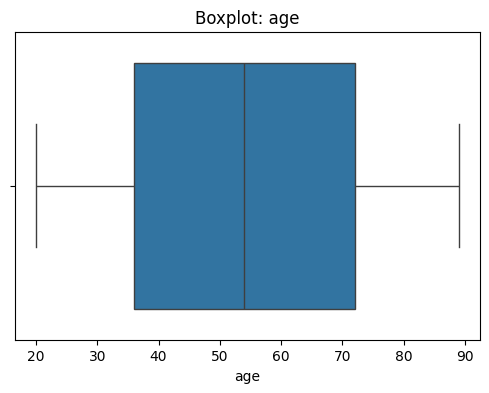

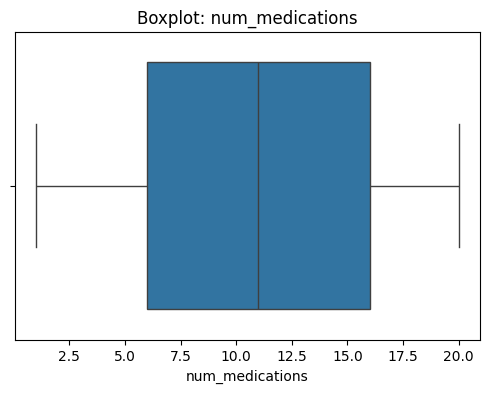

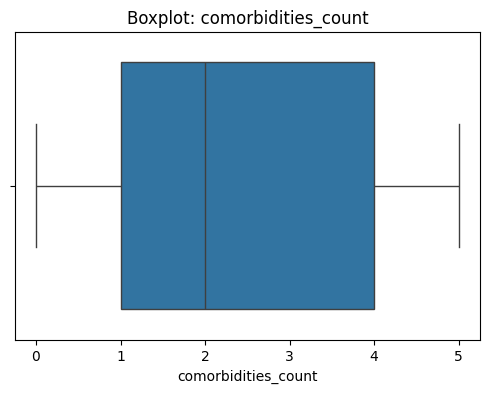

In [27]:
# Quick boxplots
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['age', 'num_medications', 'comorbidities_count']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


In [29]:
# Check for missing values
df.isnull().sum()


patient_id               0
age                      0
gender                   0
race                     0
admission_date           0
discharge_date           0
primary_diagnosis        0
num_procedures           0
num_medications          0
comorbidities_count      0
prior_visits             0
discharge_disposition    0
insurance_type           0
followup_required        0
hospital_unit            0
readmitted_within_30d    0
discharge_notes          0
dtype: int64

In [31]:
# Strip and lowercase string columns
cat_cols = ['gender', 'race', 'primary_diagnosis', 'discharge_disposition',
            'insurance_type', 'hospital_unit']

for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()


In [35]:
#length_of_stay measures
df['admission_date'] = pd.to_datetime(df['admission_date'])
df['discharge_date'] = pd.to_datetime(df['discharge_date'])

df['length_of_stay'] = (df['discharge_date'] - df['admission_date']).dt.days


In [39]:
#To check if the patient has visited before
df['had_prior_visits'] = df['prior_visits'].apply(lambda x: 1 if x > 0 else 0)


In [41]:
#To check if the patient has High Medication Usage Flag
df['high_medication_flag'] = df['num_medications'].apply(lambda x: 1 if x > 15 else 0)


In [43]:
# Grouping Diagnosis
chronic_conditions = ['diabetes', 'chf', 'copd', 'hypertension', 'kidney disease', 'asthma']
acute_conditions = ['covid-19', 'pneumonia', 'sepsis', 'stroke', 'heart attack', 'cancer']

def categorize_diag(diag):
    if diag in chronic_conditions:
        return 'chronic'
    elif diag in acute_conditions:
        return 'acute'
    else:
        return 'other'

df['diagnosis_group'] = df['primary_diagnosis'].str.lower().apply(categorize_diag)


In [45]:
df.head()

,patient_id,age,gender,race,admission_date,discharge_date,primary_diagnosis,num_procedures,num_medications,comorbidities_count,prior_visits,discharge_disposition,insurance_type,followup_required,hospital_unit,readmitted_within_30d,discharge_notes,length_of_stay,had_prior_visits,high_medication_flag,diagnosis_group
0,PID00001,71,female,asian,2023-11-24,2023-12-01,chf,1,7,4,4,ama,medicare,True,oncology,0,Patient admitted for chf. Condition stable. Fo...,7,1,0,chronic
1,PID00002,34,male,white,2023-02-27,2023-03-01,pneumonia,5,12,0,10,home,medicaid,False,cardiology,1,Patient admitted for pneumonia. Condition crit...,2,1,0,acute
2,PID00003,80,male,white,2023-01-13,2023-01-22,diabetes,0,17,2,2,home,self-pay,False,er,1,Patient admitted for diabetes. Condition stabl...,9,1,1,chronic
3,PID00004,40,male,asian,2023-05-21,2023-05-25,hypertension,1,17,5,9,rehab,medicaid,True,icu,1,Patient admitted for hypertension. Condition s...,4,1,1,chronic
4,PID00005,43,male,asian,2023-05-06,2023-05-09,covid-19,4,10,4,4,transferred,private,False,er,0,Patient admitted for covid-19. Condition stabl...,3,1,0,acute


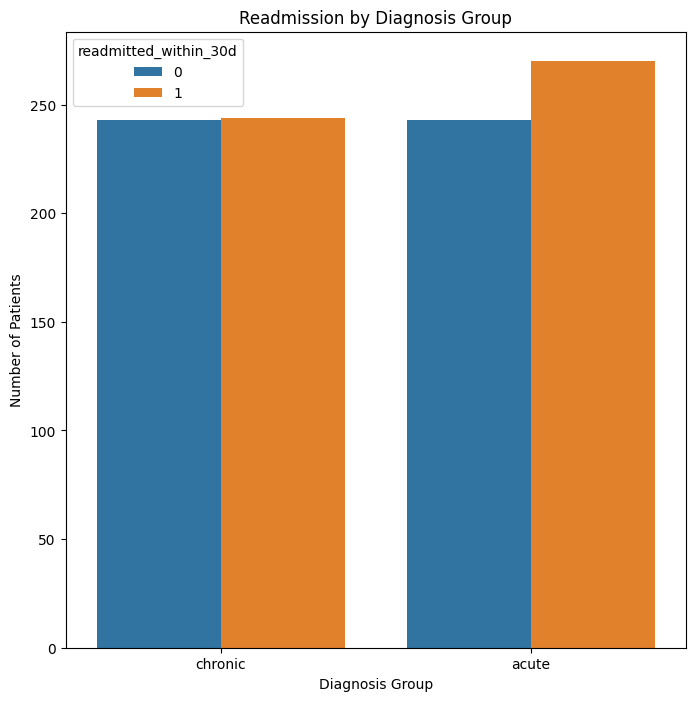

In [49]:
#Readmission by Diagnosis Group
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.countplot(x='diagnosis_group', hue='readmitted_within_30d', data=df)
plt.title("Readmission by Diagnosis Group")
plt.ylabel("Number of Patients")
plt.xlabel("Diagnosis Group")
plt.show()


Chronic Group:
Readmission rate ~50%

Acute Group:
Readmission rate appears higher than 50%

Patients with acute conditions have a higher likelihood of being readmitted within 30 days

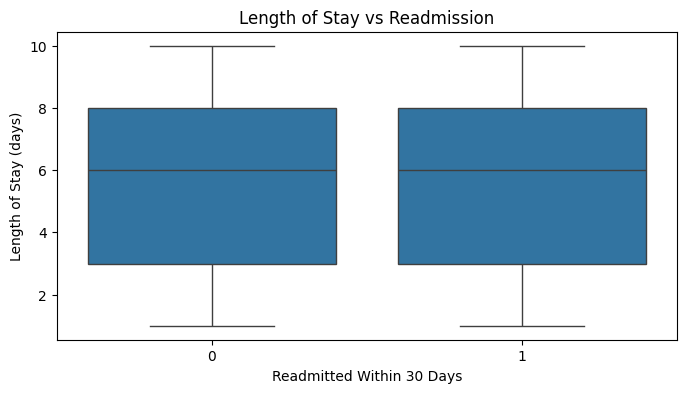

In [56]:
#Readmission vs. Length of Stay (LOS)

plt.figure(figsize=(8, 4))
sns.boxplot(x='readmitted_within_30d', y='length_of_stay', data=df)
plt.title("Length of Stay vs Readmission")
plt.xlabel("Readmitted Within 30 Days")
plt.ylabel("Length of Stay (days)")
plt.show()



The medians are the same, and there's no significant skew in either group.


The length of stay (LOS) does not appear to significantly differ between patients who were readmitted and those who were not. This suggests that LOS alone may not be a strong predictor of readmission in this dataset.

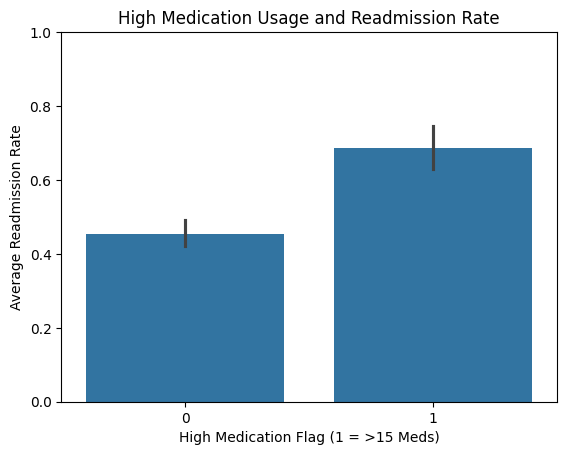

In [63]:
# High Medication Flag vs Readmission

sns.barplot(x='high_medication_flag', y='readmitted_within_30d', data=df)
plt.title("High Medication Usage and Readmission Rate")
plt.xlabel("High Medication Flag (1 = >15 Meds)")
plt.ylabel("Average Readmission Rate")
plt.ylim(0, 1)
plt.show()


Patients with high medication usage (more than 15 medications) show a noticeably higher 30-day readmission rate, indicating that polypharmacy (taking many medications) may be a strong indicator of readmission risk. This makes num_medications or high_medication_flag a valuable feature for predictive modeling.

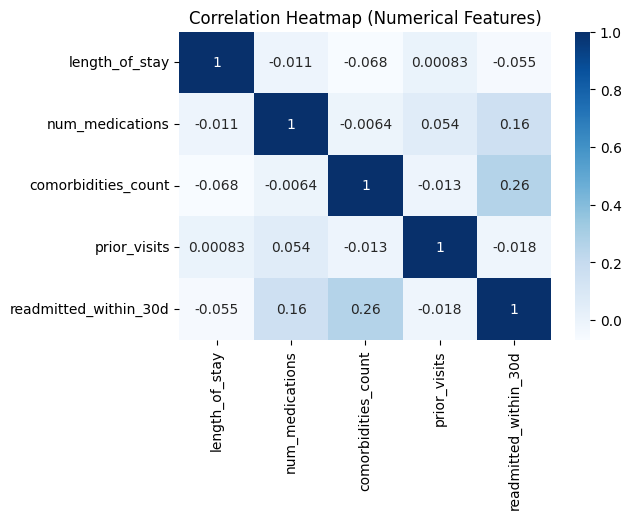

In [66]:
# LOS and Prior Visits 

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['length_of_stay', 'num_medications', 'comorbidities_count', 'prior_visits', 'readmitted_within_30d']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


Comorbidities count is your strongest numeric predictor of readmission. It makes clinical sense: patients with more conditions are harder to stabilize.

Medication count is useful, could work better in combination with other features or as a flag (e.g., high_medication_flag).

Length of stay and prior visits don’t show much correlation, which aligns with your earlier boxplot findings.

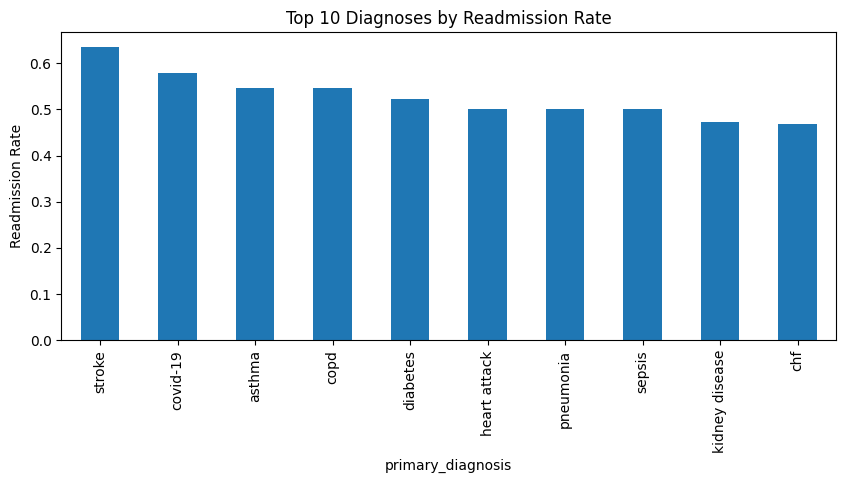

In [73]:
# Top Diagnoses Associated with Readmission

readmit_rate_by_diag = df.groupby('primary_diagnosis')['readmitted_within_30d'].mean().sort_values(ascending=False).head(10)

readmit_rate_by_diag.plot(kind='bar', figsize=(10, 4), title="Top 10 Diagnoses by Readmission Rate")
plt.ylabel("Readmission Rate")
plt.show()


Stroke has the highest readmission risk.

Infectious or respiratory conditions (COVID-19, pneumonia, sepsis, asthma) show consistently high risk.

In [80]:
# Creating high_risk_diagnosis
df['high_risk_diagnosis'] = df['primary_diagnosis'].isin(['stroke', 'covid-19', 'asthma', 'copd'])


In [82]:
df.head()

,patient_id,age,gender,race,admission_date,discharge_date,primary_diagnosis,num_procedures,num_medications,comorbidities_count,prior_visits,discharge_disposition,insurance_type,followup_required,hospital_unit,readmitted_within_30d,discharge_notes,length_of_stay,had_prior_visits,high_medication_flag,diagnosis_group,high_risk_diagnosis
0,PID00001,71,female,asian,2023-11-24,2023-12-01,chf,1,7,4,4,ama,medicare,True,oncology,0,Patient admitted for chf. Condition stable. Fo...,7,1,0,chronic,False
1,PID00002,34,male,white,2023-02-27,2023-03-01,pneumonia,5,12,0,10,home,medicaid,False,cardiology,1,Patient admitted for pneumonia. Condition crit...,2,1,0,acute,False
2,PID00003,80,male,white,2023-01-13,2023-01-22,diabetes,0,17,2,2,home,self-pay,False,er,1,Patient admitted for diabetes. Condition stabl...,9,1,1,chronic,False
3,PID00004,40,male,asian,2023-05-21,2023-05-25,hypertension,1,17,5,9,rehab,medicaid,True,icu,1,Patient admitted for hypertension. Condition s...,4,1,1,chronic,False
4,PID00005,43,male,asian,2023-05-06,2023-05-09,covid-19,4,10,4,4,transferred,private,False,er,0,Patient admitted for covid-19. Condition stabl...,3,1,0,acute,True


In [90]:
# Save to the processed data folder
df.to_csv('cleaned_featured_patient_data.csv', index=False)